In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os, sys
import math

In [12]:
def gompertz(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    return p

In [13]:
def simple_gompertz_rates(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    rate = p*(b*np.exp(a-b*t))

    #rate = rate_1*np.exp(-d*t) - d*p*np.exp(-d*t)

    return rate

In [14]:
def d_simple_gompertz_rates(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    rate_1 = -(b**2)*p*np.exp(a-b*t)

    rate_2 = (b**2)*p*np.exp(a-b*t)*np.exp(a-b*t)

    rate_rate = rate_1 + rate_2 #+  d_gompertz_rates(t,k,a,b)

    return rate_rate

In [21]:
data_directory = '/Users/sns9/Research/GrowthCurves/DemoFigures/'
os.chdir(data_directory)

In [22]:
t = np.linspace(1,100,1000)

k, a = 1, 2.0
b = [0.05,0.1,0.2]

#k, b = 1, 0.1
#a = [2.0,3.0,4.0]

N = {}
dN = {}
d2N = {}

T1 = np.zeros(shape=(len(b),))
T2 = np.zeros(shape=(len(b),))

for i in range(0,len(b)):
    N[i] = gompertz(t,k,a,b[i])
    dN[i] = simple_gompertz_rates(t,k,a,b[i])
    d2N[i] = d_simple_gompertz_rates(t,k,a,b[i])
    
    T2[i] = np.argmax(dN)
    T1[i] = np.argmax(d2N)
"""
    
for i in range(0,len(a)):
    N[i] = gompertz(t,k,a[i],b)
    dN[i] = simple_gompertz_rates(t,k,a[i],b)
    d2N[i] = d_simple_gompertz_rates(t,k,a[i],b)
    
"""

'\n    \nfor i in range(0,len(a)):\n    N[i] = gompertz(t,k,a[i],b)\n    dN[i] = simple_gompertz_rates(t,k,a[i],b)\n    d2N[i] = d_simple_gompertz_rates(t,k,a[i],b)\n    \n'

In [23]:
c = math.log(0.5*(3 + math.sqrt(5)))
print(c,math.exp(-math.exp(c)))

for i in range(0,len(b)):
    k = np.argmax(d2N[i])
    print(k,d2N[i][k],np.amax(d2N[i]),t[k],N[i][k])
    
    t1 = (a - c)/b[i]
    
    print(t1)
    
    t12 = (a - math.log(math.exp(c) - math.log(2)))/b[i]
    
    print(t12)

0.9624236501192069 0.07294613486586596
199 0.0007725086491630164 0.0007725086491630164 20.72072072072072 0.07265233928713845
20.75152699761586
26.90265669858763
95 0.003089964364212625 0.003089964364212625 10.414414414414415 0.07368658059671938
10.37576349880793
13.451328349293815
42 0.012359599705436966 0.012359599705436966 5.162162162162162 0.0719678609459667
5.187881749403965
6.725664174646908


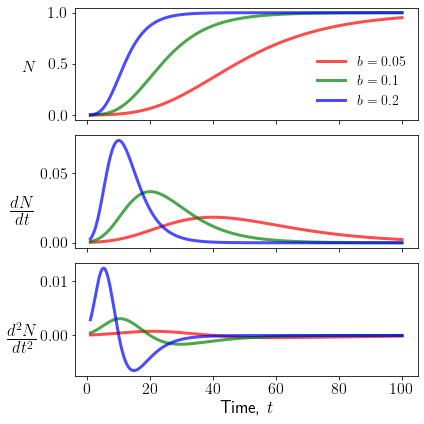

In [24]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize=(6,6),sharex='all')

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

plt.rc('text', usetex=True)

ax0.plot(t,N[0],color='r',linewidth=3,alpha=0.7,label=r'$b=0.05$')
ax0.plot(t,N[1],color='g',linewidth=3,alpha=0.7,label=r'$b=0.1$')
ax0.plot(t,N[2],color='b',linewidth=3,alpha=0.7,label=r'$b=0.2$')
ax0.set_ylabel(r"$N$",size=16,rotation=0,labelpad=20,position=(1,0.4))
ax0.tick_params(labelsize=16)
ax0.legend(frameon=False,prop={'size': 14})

ax1.plot(t,dN[0],color='r',linewidth=3,alpha=0.7)
ax1.plot(t,dN[1],color='g',linewidth=3,alpha=0.7)
ax1.plot(t,dN[2],color='b',linewidth=3,alpha=0.7)
ax1.set_ylabel(r"$\frac{dN}{dt}$",size=24,rotation=0,labelpad=18,position=(1,0.2))
ax1.tick_params(labelsize=16)

ax2.plot(t,d2N[0],color='r',linewidth=3,alpha=0.7)
ax2.plot(t,d2N[1],color='g',linewidth=3,alpha=0.7)
ax2.plot(t,d2N[2],color='b',linewidth=3,alpha=0.7)
ax2.set_ylabel(r"$\frac{d^{2}N}{dt^{2}}$",size=24,rotation=0,labelpad=18,position=(1,0.2))
ax2.set_xlabel(r"Time, $t$",size=18)
ax2.tick_params(labelsize=16)

plt.tight_layout()

#plt.savefig('gompertz-demo.png',dpi=600)

In [25]:
tH = np.array([0,5,10,15,20,30,60])

tt1 = 33.5 + 4.12*tH
print(np.floor(tt1-4))
print(np.floor(tt1+4))

[ 29.  50.  70.  91. 111. 153. 276.]
[ 37.  58.  78.  99. 119. 161. 284.]


In [35]:
a = np.array([1.5,1.6,1.95,2.14,7.93,8.3,7.3])
b = np.array([0.02,0.013,0.019,0.013,0.053,0.043,0.016])
tH = np.array([0,5,10,15,20,30,60])
output_data = np.zeros(shape=(tH.shape[0],5))
output_data[:,0] = tH

for i in range(0,b.shape[0]):
    t1 = (a[i] - c)/b[i]
    
    t12 = (a[i] - math.log(math.exp(c) - math.log(1.5)))/b[i]
    
    t2 = a[i]/b[i]
    
    print(t1,t12)
    
    N1 = math.exp(-math.exp(a[i] - t1*b[i]))
    N2 = math.exp(-math.exp(a[i] -t2*b[i]))
    
    output_data[i,1] = t1
    output_data[i,2] = N1
    output_data[i,3] = t2
    output_data[i,4] = N2
    
    #print(N1,N12)
    
np.savetxt('t1t2N1N2.csv',output_data,delimiter=',',comments='',header='TH (min),T1 (h),N1,T2 (h),N2')

26.87881749403965 35.29228850456105
49.04433460621486 61.98813616086317
51.9777026253049 60.83398789953795
90.58279614467641 103.52659769932471
131.46370471473196 134.6385994356834
170.64131046234405 174.55455279281912
396.09852186754955 406.6153606307013


In [34]:
c = math.log(0.5*(3 + math.sqrt(5)))
N1 = math.exp(-math.exp(c))
nfacs = np.array([1.0,1.25,1.5,1.75,2.0])
output_data = np.zeros(shape=(tH.shape[0],1+2*nfacs.shape[0]))
print(output_data.shape)
output_data[:,0] = tH
head_string = 'TH (min),T1 (h),N1,1.25T1 (h),1.25N1,1.5T1 (h),1.5N1,1.75T1 (h),1.75N1,2T1 (h),2N1'

for i in range(0,b.shape[0]):
    for j in range(0,nfacs.shape[0]):
        t = (a[i] - math.log(math.exp(c) - math.log(nfacs[j])))/b[i]
        N = math.exp(-math.exp(a[i] -t*b[i]))
        
        output_data[i,2*j+1] = t
        output_data[i,2*j+2] = N
        
np.savetxt('t1N1s.csv',output_data,delimiter=',',comments='',header=head_string)

(7, 11)
